In [4]:
from pprint import pprint
#from pybea.client import BureauEconomicAnalysisClient
import pandas as pd
import numpy as np
import os 
import requests
import matplotlib.pyplot as plt
import warnings
import prettytable
warnings.filterwarnings('ignore')

In [5]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()


In [7]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNS14000000'],"startyear":"2015", "endyear":"2020"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)

In [9]:
json_data = json.loads(p.text)

In [21]:
df = pd.json_normalize(json_data['Results']['series'][0]['data'])

In [23]:
df['Date'] = df['year'].astype(str) + df['period'].astype(str)

In [28]:
df['value'] = df['value'].astype(float)

In [32]:
df.sort_values('year')

,year,period,periodName,value,footnotes,Date
71,2015,M01,January,5.7,[{}],2015M01
60,2015,M12,December,5.0,[{}],2015M12
61,2015,M11,November,5.1,[{}],2015M11
62,2015,M10,October,5.0,[{}],2015M10
63,2015,M09,September,5.0,[{}],2015M09
...,...,...,...,...,...,...
9,2020,M03,March,4.4,[{}],2020M03
10,2020,M02,February,3.5,[{}],2020M02
11,2020,M01,January,3.5,[{}],2020M01
6,2020,M06,June,11.1,[{}],2020M06


<AxesSubplot:xlabel='Date'>

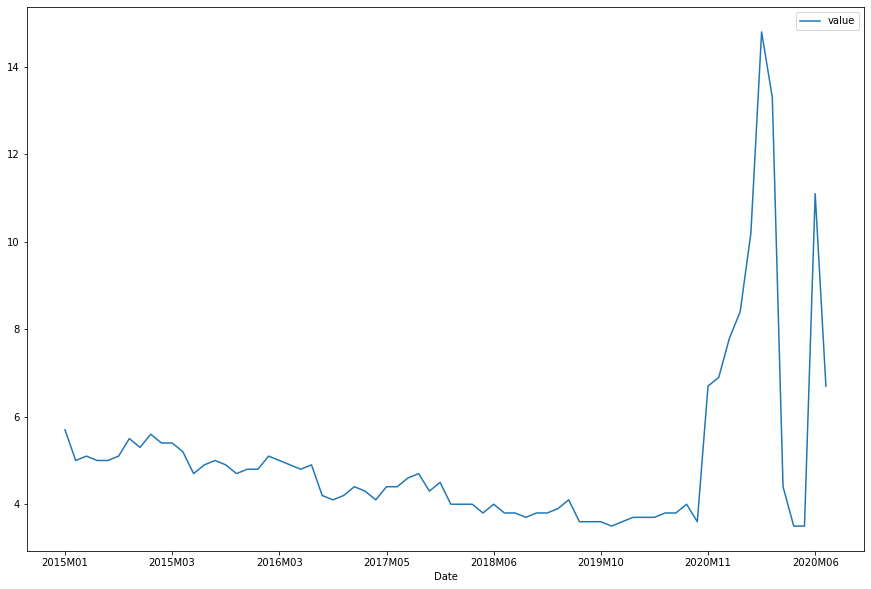

In [33]:
df.sort_values('year').plot(x='Date',y='value',figsize=(15,10))

In [34]:
def plot_employment(df):
    df['Date'] = df['year'].astype(str) + df['period'].astype(str)
    df['value'] = df['value'].astype(float)
    df.sort_values('year').plot(x='Date',y='value',figsize=(15,10))

In [ ]:
##################################

In [35]:
# Get Inflation data
#CUSR0000SA0
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUSR0000SA0'],"startyear":"2015", "endyear":"2020"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [49]:
df_inflation = pd.json_normalize(json_data['Results']['series'][0]['data'])

In [62]:
df_inflation.sort_values(by=['year','period'])

,year,period,periodName,value,footnotes,Date
71,2015,M01,January,234.747,[{}],2015-M01
70,2015,M02,February,235.342,[{}],2015-M02
69,2015,M03,March,235.976,[{}],2015-M03
68,2015,M04,April,236.222,[{}],2015-M04
67,2015,M05,May,237.001,[{}],2015-M05
...,...,...,...,...,...,...
4,2020,M08,August,259.511,[{}],2020-M08
3,2020,M09,September,260.149,[{}],2020-M09
2,2020,M10,October,260.462,[{}],2020-M10
1,2020,M11,November,260.927,[{}],2020-M11


In [63]:
def plot_inflation(df):
    df['Date'] = df['year'].astype(str) + '-' + df['period'].astype(str)
    df['value'] = df['value'].astype(float)
    df.sort_values(['year','period']).plot(x='Date',y='value',figsize=(15,10),title='CPI Over Time')

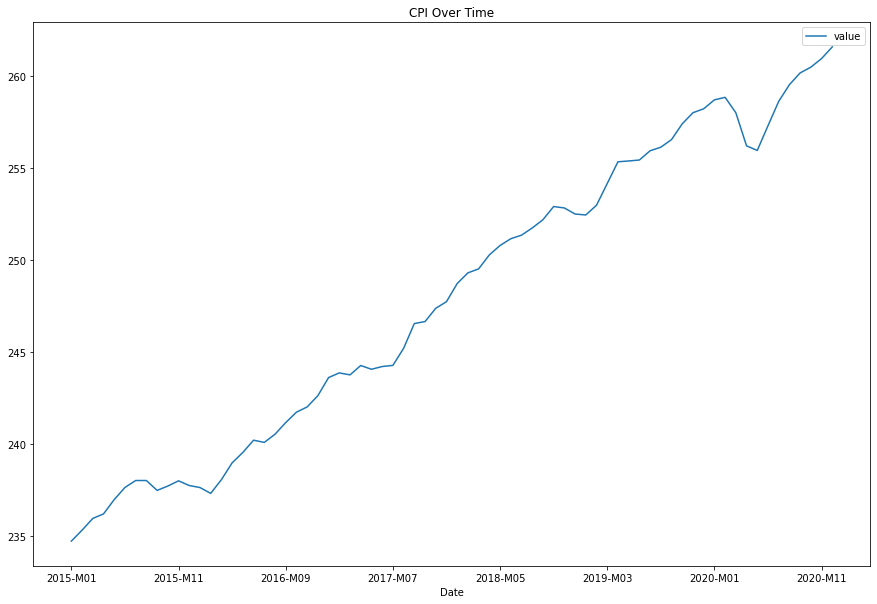

In [64]:
plot_inflation(df_inflation)

In [65]:
##############################

In [66]:
#Income data
#CIU1010000000000A

In [67]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CIU1010000000000A'],"startyear":"2015", "endyear":"2020"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [74]:
df_wages = pd.json_normalize(json_data['Results']['series'][0]['data'])